Customer Service Requests Analysis Project 

In [2]:
#Import Librabries 
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

1. Import NYC request

In [7]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', header=0,
    sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')

2. Covert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’
Remove null and junk data like closed date < create date , Borough = 'Unspecidfied'


In [8]:
#Prepare data
def prepareData(df):
    df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() ####days/3600
    df_clean=df[df['Resolution_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month'] = df_perfect['Created Date'].dt.month
    df_perfect['Year'] = df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [9]:
#shape
df_perfect = prepareData(df)
df_perfect.shape


(8219, 57)

<AxesSubplot:title={'center':'Most common Complaints'}>

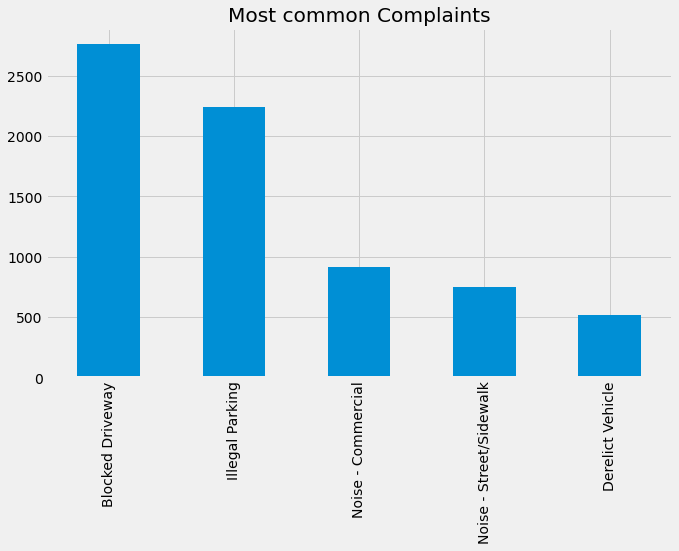

In [10]:
#Most frequent Complaints
(df_perfect['Complaint Type'].value_counts()).head().plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')


<AxesSubplot:title={'center':'Least frequent Complaints'}>

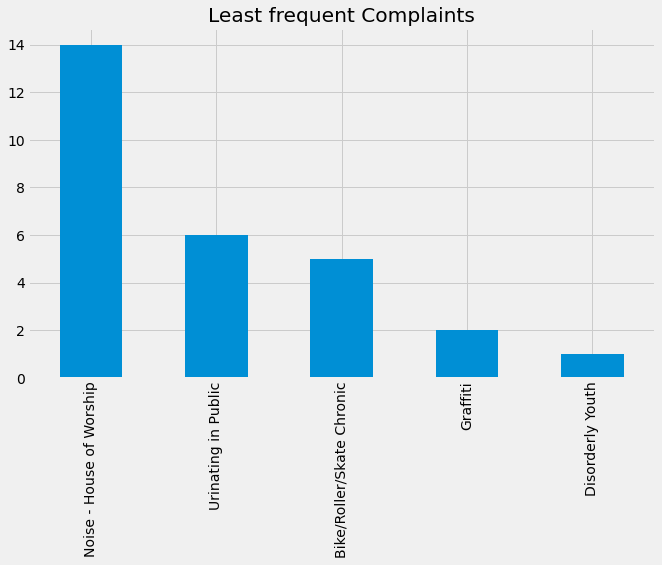

In [11]:
#Least frequent Complaints
(df_perfect['Complaint Type'].value_counts()).tail().plot(kind='bar',
                    figsize=(10,6), title = 'Least frequent Complaints')

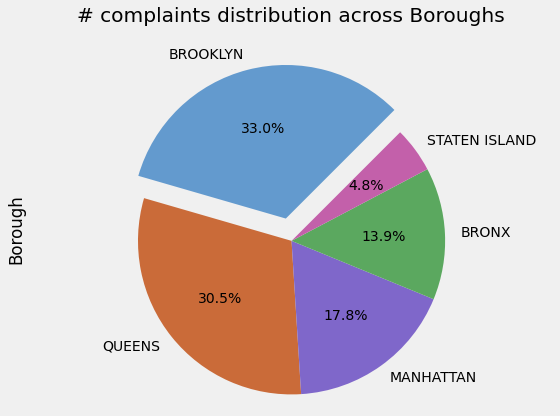

In [12]:
# complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_perfect['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs\n')
plt.tight_layout()
plt.show()


In [13]:
#Analysis for Brooklyn borough which has highest number of complains
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']

In [14]:
df_Brooklyn.shape

(2713, 57)

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

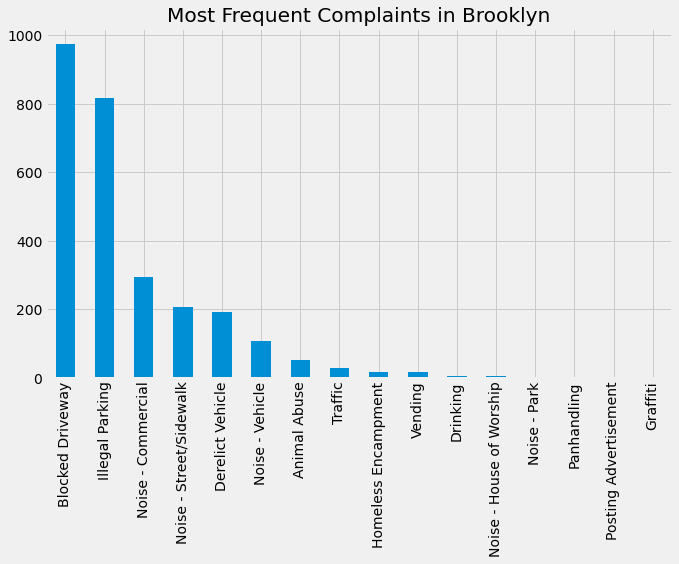

In [15]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

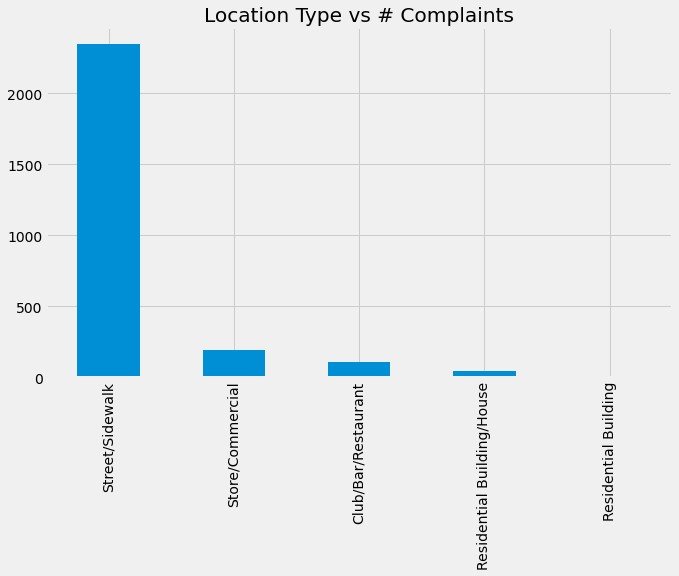

In [16]:
#location type vs complaints
(df_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')


In [17]:
#Anlysis of Most Frequent complaint in Brooklyn
df_perfect[df_perfect['Complaint Type'] == 'Blocked Driveway']['Descriptor'].value_counts()


No Access         2093
Partial Access     669
Name: Descriptor, dtype: int64

In [18]:
df_Brook_blocked = df_Brooklyn[df_Brooklyn['Complaint Type'] == 'Blocked Driveway']

(-74.04631961569767, -73.84865631430233, 40.5690304865, 40.745198203499996)

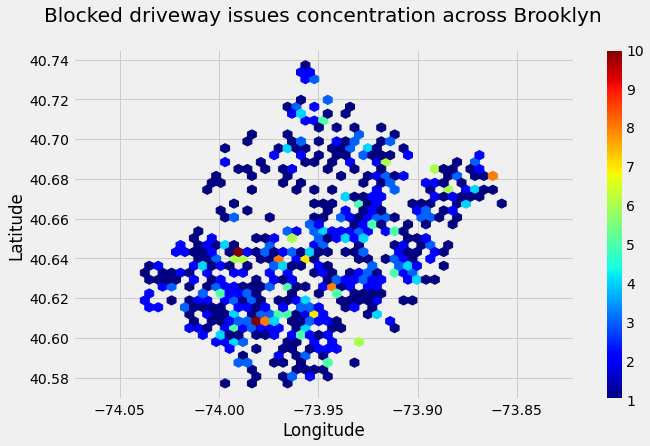

In [19]:
df_Brook_blocked.plot(
    kind='hexbin', x='Longitude', y='Latitude', gridsize=40,title = 'Blocked driveway issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

<AxesSubplot:title={'center':'Volume of Blocked driveway issues by Month\n'}>

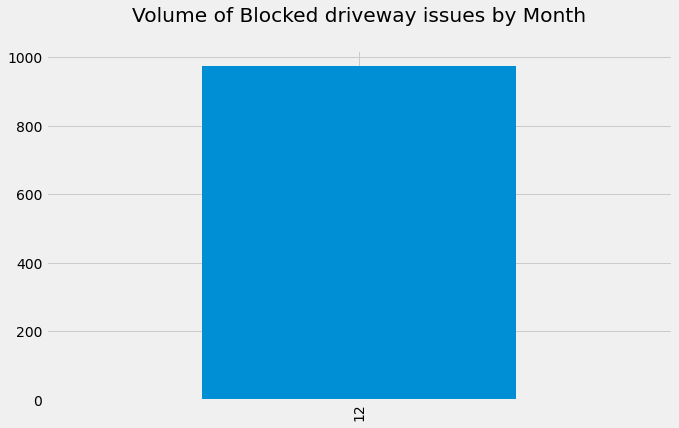

In [20]:
df_Brook_blocked['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Blocked driveway issues by Month\n')

4. Request_Closing_Time’ in Seconds, grouping them for different locations, order by complaint type

In [21]:
df_avg_res_time_city = df_perfect.groupby(['City','Complaint Type']).Resolution_Time.mean()

In [22]:
#df_perfect.sort_values('Complaint Type').groupby('City')
#
df_avg_res_time_city.head(25)


City       Complaint Type           
ARVERNE    Animal Abuse                  5782.500000
           Illegal Parking              11270.000000
           Noise - Commercial            5437.000000
ASTORIA    Animal Abuse                  7762.750000
           Bike/Roller/Skate Chronic     5101.000000
           Blocked Driveway             15462.936709
           Derelict Vehicle             19968.666667
           Drinking                      6425.000000
           Homeless Encampment          18789.000000
           Illegal Parking              13865.850000
           Noise - Commercial            8334.478261
           Noise - Street/Sidewalk      10814.875000
           Noise - Vehicle              10660.000000
BAYSIDE    Blocked Driveway              7855.142857
           Derelict Vehicle              7374.600000
           Illegal Parking               8383.333333
           Noise - Street/Sidewalk       2031.000000
           Noise - Vehicle               7054.000000
BELLEROSE

Average response time across complaint types in seconds

In [23]:
#Average response time in seconds across complaint types
df_avg_res_time = df_perfect.groupby('Complaint Type').Resolution_Time.mean().sort_values(ascending=True)
df_avg_res_time.head(21)


Complaint Type
Disorderly Youth               713.000000
Posting Advertisement         4548.723404
Noise - House of Worship      4762.142857
Urinating in Public           9464.666667
Vending                       9974.666667
Bike/Roller/Skate Chronic    11019.000000
Noise - Commercial           11226.895539
Homeless Encampment          12681.362069
Panhandling                  12845.357143
Noise - Street/Sidewalk      12860.553333
Graffiti                     14291.500000
Noise - Vehicle              14388.532110
Traffic                      14902.372340
Illegal Parking              15158.906013
Blocked Driveway             17565.315713
Animal Abuse                 19493.415094
Noise - Park                 21282.923077
Drinking                     23584.263158
Derelict Vehicle             24489.712355
Name: Resolution_Time, dtype: float64

From the above data null hypothesis can be rejected . Since the average response time across complaint type are not equal.Null Hypothesis : Average response time across complaint type are equal. Alternate Hypothesis : Average response time across complaint type are equal
Following complains have resolution times which are very close. Disorderly Youth 12810.902098 Noise - Vehicle 12918.914430 One group can be formed for these complaints and one way Anova for this can be performed


In [24]:
df_dis_youth = df_perfect[df_perfect['Complaint Type']=='Disorderly Youth']
df_dis_youth = df_dis_youth.loc[:,['Resolution_Time']]
df_dis_youth.head()
#df_dis_youth.columns
#df_avg_res_time  = df_avg_res_time.to_frame()
#df_avg_res_time.columns()
#df_dis_youth.Complaint Type.unique()

,Resolution_Time
Unique Key,
32274507,713.0


In [25]:
df_noise_veh = df_perfect[df_perfect['Complaint Type']=='Noise - Vehicle']
df_noise_veh = df_noise_veh.loc[:,['Resolution_Time']]
df_noise_veh.head()
#df_noise_veh.columns
#df_noise_veh.info()

,Resolution_Time
Unique Key,
32307159,22949.0
32308722,7254.0
32308107,11319.0
32308108,10937.0
32306622,2615.0


In [26]:
df_type_res = df_perfect.loc[:, ['Complaint Type','Resolution_Time']]
df_type_res.head()
df_type_res.columns

Index(['Complaint Type', 'Resolution_Time'], dtype='object')

In [28]:
#stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df_dis_youth, df_noise_veh)
pvalue

array([0.548001])

Null hypothesis to be accepted for Disorderly Youth and Noise - Vehicle p-value close to 1

One Way Anova for Posting Advertisement and Derelict Vehicle

In [29]:
df_post_ad = df_perfect[df_perfect['Complaint Type']=='Posting Advertisement']
df_post_ad = df_post_ad.loc[:,['Resolution_Time']]
df_post_ad.head()

,Resolution_Time
Unique Key,
32306752,7596.0
32307464,7745.0
32308949,7834.0
32307323,8042.0
32306034,8137.0


In [30]:
df_der_veh = df_perfect[df_perfect['Complaint Type']=='Derelict Vehicle']
df_der_veh = df_der_veh.loc[:,['Resolution_Time']]
df_der_veh.head()

,Resolution_Time
Unique Key,
32309424,37763.0
32306497,14221.0
32305124,4913.0
32308002,14879.0
32305798,2712.0


In [31]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df_post_ad, df_der_veh) 
pvalue

array([7.50405774e-05])

Null hypothesis for Posting Advertisement and Derelict Vehicle to be rejected p-value < 0.05
Anova table for complain type and resolution time


In [32]:
# get ANOVA table for complain type and resolution time

# reshape the d dataframe suitable for statsmodels package 
df_perfect['Complaint_Type']=df_perfect['Complaint Type']
df_type_res = df_perfect.loc[:, ['Complaint_Type','Resolution_Time']]  #Complaint Type
# Ordinary Least Squares (OLS) model
model = ols('Resolution_Time ~ Complaint_Type', data=df_type_res).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
Complaint_Type,9.470215e+10,18.0,9.834837,8.107671e-28
Residual,4.386661e+12,8200.0,NaN,NaN


Null Hypothesis to be rejected since p-value < 0.05

Crosstab and Chi Square test for Location and Complaint type

In [33]:
df_city_type = pd.crosstab(df_perfect.City , df_perfect.Complaint_Type)

In [34]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [35]:
# contingency table
table = df_city_type


In [36]:
#print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)


dof=774
[[1.03175569e-01 2.43338606e-03 1.34420246e+00 2.52098795e-01
  4.86677211e-04 1.84937340e-02 9.73354423e-04 5.64545565e-02
  1.09259034e+00 4.47256357e-01 6.81348096e-03 1.26536075e-02
  3.65007909e-01 1.59143448e-01 6.81348096e-03 2.28738289e-02
  4.57476579e-02 2.92006327e-03 5.98612970e-02]
 [4.33337389e+00 1.02202214e-01 5.64565032e+01 1.05881494e+01
  2.04404429e-02 7.76736829e-01 4.08808858e-02 2.37109137e+00
  4.58887943e+01 1.87847670e+01 2.86166200e-01 5.31451515e-01
  1.53303322e+01 6.68402482e+00 2.86166200e-01 9.60700815e-01
  1.92140163e+00 1.22642657e-01 2.51417447e+00]
 [6.70641197e-01 1.58170094e-02 8.73731598e+00 1.63864217e+00
  3.16340187e-03 1.20209271e-01 6.32680375e-03 3.66954617e-01
  7.10183721e+00 2.90716632e+00 4.42876262e-02 8.22484487e-02
  2.37255141e+00 1.03443241e+00 4.42876262e-02 1.48679888e-01
  2.97359776e-01 1.89804112e-02 3.89098430e-01]
 [2.32145030e-01 5.47511863e-03 3.02445553e+00 5.67222290e-01
  1.09502373e-03 4.16109016e-02 2.19004745

In [37]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


probability=0.950, critical=839.833, stat=4269.573
Dependent (reject H0)


In [38]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


significance=0.050, p=0.000
Dependent (reject H0)


In [39]:
dof=1040